In [1]:
import axelrod as axl
import numpy as np
import pandas as pd
import scipy as sp
from sympy import *
import random
from itertools import groupby
import difflib

from pyecharts import options as opts
from pyecharts.charts import Pie
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from IPython.display import display, HTML

In [2]:
#axl.ZDExtortion(phi = 0.1, s = 0.5)

In [3]:
#me = axl.Human(name='me')
#players = [axl.TitForTat(), me]
#match = axl.Match(players, turns = 3)

In [4]:
armyrose = ['#798234', '#a3ad62', '#d0d3a2', '#fdfbe4', '#f0c6c3', '#df91a3', '#d46780']
fall = ['#3d5941', '#778868', '#b5b991', '#f6edbd', '#edbb8a', '#de8a5a', '#ca562c']
geyser = ['#008080', '#70a494', '#b4c8a8', '#f6edbd', '#edbb8a', '#de8a5a', '#ca562c']
temps = ['#009392', '#39b185', '#9ccb86', '#e9e29c', '#eeb479', '#e88471', '#cf597e']
tealrose = ['#009392', '#72aaa1', '#b1c7b3', '#f1eac8', '#e5b9ad', '#d98994', '#d0587e']
tropic = ['#009B9E', '#42B7B9', '#A7D3D4', '#F1F1F1', '#E4C1D9', '#D691C1', '#C75DAB']
earth = ['#A16928', '#bd925a', '#d6bd8d', '#edeac2', '#b5c8b8', '#79a7ac', '#2887a1']

In [5]:
# Define symbols
R, S, T, P = symbols('R, S, T, P', real = True) # payoffs
chi, phi = symbols('chi, phi', real = True) # parameters for the probabilities
Q_1 = 1 - (R - P)*phi*(chi - 1)
Q_2 = 1 - phi*((T - P)*chi + (P - S))
Q_3 = phi*((P - S)*chi + (T - P))
Q_4 = phi*(P - P)

phi_upper_con = 1/(chi*(T - P) + (P - S)) # the range of phi is 0 < phi < phi_upper 
phi_upper_abn = 1/(chi*(P - S) + (T - P)) # the range of phi is 0 < phi < phi_upper

payoff_con_subs = [(R, 3), (S, 0), (T, 5), (P, 1)] # payments of the conventional IPD

human_score_dict = {('C', 'C'): R, ('C', 'D'): S, ('D', 'C'): T, ('D', 'D'): P}
ZD_score_dict = {('C', 'C'): R, ('C', 'D'): T, ('D', 'C'): S, ('D', 'D'): P}

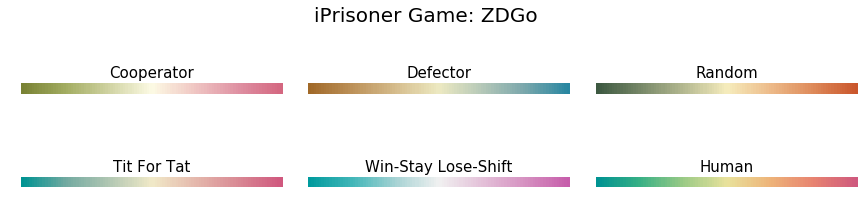

In [6]:
strategies = ['Cooperator', 'Defector', 'Random', 'Tit For Tat', 'Win-Stay Lose-Shift', 'Human']
descriptions = ['A player who only ever cooperates. ' + r'$p = [1, 1, 1, 1]$', 'A player who only ever defects. ' + r'$p = [0, 0, 0, 0]$', 
                'A player who randomly chooses between cooperating and defecting. ' + r'$p = [0.5, 0.5, 0.5, 0.5]$', 
                'A player who starts by cooperating and then repeats the opponent’s previous move. '+ r'$p = [1, 0, 1, 0]$',
                'A player who repeats the previous move if the resulting payoff has met its aspiration level and changes otherwise. ' + r'$p = [1, 0, 0, 1]$',
                'A player does whatever you want.']
p_0_dict = {'Cooperator': 1, 'Defector': 0, 'Random': 0.5, 'Tit For Tat': 1, 'Win-Stay Lose-Shift': 1, 'Human': np.nan}
p_dict = {'Cooperator': [1, 1, 1, 1], 'Defector': [0, 0, 0, 0], 'Random': [0.5, 0.5, 0.5, 0.5], 
          'Tit For Tat': [1, 0, 1, 0], 'Win-Stay Lose-Shift': [1, 0, 0, 1], 'Human': [np.nan, np.nan, np.nan, np.nan]}

cmaps = [armyrose, earth, fall, tealrose, tropic, temps]
fig, axes = plt.subplots(2, 3, figsize = (3*5, 2*2), sharey = False)
fig.subplots_adjust(hspace = -0.25, wspace = 0.1)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
for i, title in enumerate(strategies):
    ix = np.unravel_index(i, axes.shape)
    ax = axes[ix]
    cm = LinearSegmentedColormap.from_list('tealrose', cmaps[i], N = 100)
    ax.imshow(gradient, aspect = 5, cmap = cm)
    ax.axis("off")
    ax.set_title(title, fontsize = 15) 
fig.suptitle('iPrisoner Game: ZDGo', fontsize = 20, y = 0.95)
fig.savefig('cover.png', dpi = 400)

def ZDGo(printing = True):
    
    player = input("Enter your player: ")
    while player not in strategies:
        # find closest match
        options = difflib.get_close_matches(player, strategies)
        if len(options) == 1:
            player = input("Do you mean " + options[0] + '? If yes, enter ' + options[0] +  ", otherwise, choose another player: ")
        else:
            player = input("Unjustified player, re-enter your player: ")
             
    n = input("Enter number of rounds n (n is a positive integer): ")
    while True:
        try:
            val = int(n)
            if val < 0:  # if not a positive int print message and ask for input again
                n = input("Input is not a positive integer. Re-enter n: ")
                continue
            break
        except ValueError:
            try:
                val = float(n)
                n = input("Input is a float. Re-enter n: ")
            except ValueError:
                n = input("Input is not a number. Re-enter n: ")
    n = int(n)
    chi_value = input("Enter chi (chi is the extortion factor and is a number no less than 1): ")
    while True:
        try:
            val = float(chi_value)
            if val < 1:
                chi_value = input("Input is less than 1. Re-enter chi: ")
                continue
            break
        except ValueError:
            chi_value = input("Input is not a number. Re-enter chi: ")
    chi_value = float(chi_value)
    
    df_information = pd.DataFrame(data = {'your strategy': [player], 'number of rounds': [n], 'extortion factor': [chi_value]})
    df_information.index = ['']
    display(HTML(df_information.to_html()))
        
    chi_subs = [(chi, chi_value)]
    payoff_subs, phi_upper = payoff_con_subs, phi_upper_con
    phi_value = 1/2*phi_upper.subs(payoff_subs).subs(chi_subs)
    phi_subs = [(phi, phi_value)]
    q_1 = Q_1.subs(payoff_subs).subs(chi_subs + phi_subs)
    q_2 = Q_2.subs(payoff_subs).subs(chi_subs + phi_subs)
    q_3 = Q_3.subs(payoff_subs).subs(chi_subs + phi_subs)
    q_4 = Q_4.subs(payoff_subs).subs(chi_subs + phi_subs)
    
    #  count the frequencies of different outcomes
    def freqs(outcomes):
        freq_cc = outcomes.count(('C', 'C'))
        freq_cd = outcomes.count(('C', 'D'))
        freq_dc = outcomes.count(('D', 'C'))
        freq_dd = outcomes.count(('D', 'D'))
        return freq_cc, freq_cd, freq_dc, freq_dd
    
    # calculate the average scores of human player and ZD extorter
    def scores(outcomes):
        outcomes = outcomes.copy()
        outcomes.sort()
        # frequencies of (C, C), (C, D), (D, C) and (D, D)
        frequencies = [(key, len(list(group))) for key, group in groupby(outcomes)]
        human_score = ZD_score = 0
        for item in frequencies:
            outcome = item[0]
            freq = item[1]
            human_score += human_score_dict[outcome].subs(payoff_subs)*freq
            ZD_score += ZD_score_dict[outcome].subs(payoff_subs)*freq
        # take the average
        human_score /= n
        ZD_score /= n
        return float(human_score), float(ZD_score)
    
    # decide the action of ZD strategy according to the outcome of the last round
    def ZDAction(last_round):
        if last_round == ('C', 'C'):
            return (lambda x: 'C' if x <= q_1 else 'D')(random.uniform(0, 1))
        elif last_round == ('C', 'D'):
            return (lambda x: 'C' if x <= q_3 else 'D')(random.uniform(0, 1))
        elif last_round == ('D', 'C'):
            return (lambda x: 'C' if x <= q_2 else 'D')(random.uniform(0, 1))
        else:
            return (lambda x: 'C' if x <= q_4 else 'D')(random.uniform(0, 1))
        
    # decide the action of player according to the outcome of the last round
    def Action(last_round, p):
        p_1, p_2, p_3, p_4 = p
        if last_round == ('C', 'C'):
            return (lambda x: 'C' if x <= p_1 else 'D')(random.uniform(0, 1))
        elif last_round == ('C', 'D'):
            return (lambda x: 'C' if x <= p_2 else 'D')(random.uniform(0, 1))
        elif last_round == ('D', 'C'):
            return (lambda x: 'C' if x <= p_3 else 'D')(random.uniform(0, 1))
        else:
            return (lambda x: 'C' if x <= p_4 else 'D')(random.uniform(0, 1))
        
    def NonHuman(p_0, p):
        i = 0
        outcomes = []
        while i < n:
            if i == 0:
                action = (lambda x: 'C' if x <= p_0 else 'D')(random.uniform(0, 1))
                ZD_action = 'C'
            else:
                action = Action(outcomes[-1], p)
                ZD_action = ZDAction(outcomes[-1])
                
            outcomes.append((action, ZD_action))
            if printing == True:
                print("round " + str(i + 1) + '| outcome: ' + '(' + action + ', ' + ZD_action + ')')
            i += 1
        return outcomes
    
    def Human():
        i = 0
        outcomes = []
        while i < n:
            human_action = input("Round " + str(i + 1) + '| enter your action (C or D): ')
            while human_action not in ['C', 'D']:
                human_action = input('Unjustified action, re-enter your action: ')
            if i == 0:
                ZD_action = 'C'
            else:
                ZD_action = ZDAction(outcomes[-1])
            outcomes.append((human_action, ZD_action))
            if printing == True:
                print("round " + str(i + 1) + '| outcome: ' + '(' + human_action + ', ' + ZD_action + ')')
            i += 1
        return outcomes
    
    if player == 'Human':
        outcomes = Human()
    else:
        outcomes = NonHuman(p_0_dict[player], p_dict[player])
        
    
    df_information["player's score"] = [scores(outcomes)[0]]
    df_information["ZD's score"] = [scores(outcomes)[1]]
    freq_cc, freq_cd, freq_dc, freq_dd = freqs(outcomes)
    df_information['(C, C) pair'] = [freq_cc]
    df_information['(C, D) pair'] = [freq_cd]
    df_information['(D, C) pair'] = [freq_dc]
    df_information['(D, D) pair'] = [freq_dd]
    
    display(HTML(df_information.to_html()))
    
    # change data type
    columns = df_information.columns.tolist()
    columns = columns[1:]
    for col in columns:
        df_information[col] = df_information[col].astype(float)
            
    return df_information, outcomes

In [7]:
def figure_pie(df_information):
    
    title = 'ZDGo'
    subtitle = df_information['your strategy'].tolist()[0] + ' against ZD strategy'
    chi_value = df_information['extortion factor'].tolist()[0]
    scores = [df_information["player's score"].tolist()[0], df_information["ZD's score"].tolist()[0]]
    freqs = df_information.iloc[0].tolist()[-4:]
    
    pie = Pie(init_opts = opts.InitOpts(width='600px', height='500px'))
    v = ['(C, C)', '(C, D)', '(D, C)', '(D, D)']
    d = freqs
    pie.add("frequency", [list(z) for z in zip(v, d)],
                radius = ["35%", "60%"], 
                center = ["50%", "55%"],
                rosetype = "radius",
                label_opts = opts.LabelOpts(
                            position = "outside",
                            formatter = "{b|{b}}{abg|}\n{hr|}\n {c|{c} } {per|{d}%}  ", # formatter = "{a|{a}}{abg|}\n{hr|}\n {b|{b}: }{c}  {per|{d}%}  ",
                            background_color = "#eee",
                            border_color = "#aaa",
                            border_width = 1,
                            border_radius = 4,
                            rich = {
                                "b": {"color": "#999", "fontSize": 12, "lineHeight": 20, "align": "center"},
                                "abg": {
                                    "backgroundColor": "#e3e3e3",
                                    "width": "100%",
                                    "align": "right",
                                    "height": 20,
                                    "borderRadius": [4, 4, 0, 0],
                                },
                                "hr": {
                                    "borderColor": "#aaa",
                                    "width": "100%",
                                    "borderWidth": 0.5,
                                    "height": 0,
                                },
                                "c": {"fontSize": 12, "lineHeight": 25},
                                "per": {
                                    "fontSize": 12, 
                                    "color": "#eee",
                                    "backgroundColor": "#334455",
                                    "height": 10,
                                    "padding": [2, 2],
                                    "borderRadius": 4,
                                },
                                "d": {"fontSize": 4},
                            },
                        ),
                )
    pie.set_global_opts(title_opts = opts.TitleOpts(title = title, subtitle = subtitle + '\n\n' + 'chi: ' + str(chi_value) + '  ' + 'scores: ' + '(' + str(scores[0]) + ', ' + str(scores[1]) + ')',
                                                    title_textstyle_opts = opts.TextStyleOpts(font_size = 20),
                                                    subtitle_textstyle_opts = opts.TextStyleOpts(font_size = 16)),
                    legend_opts = opts.LegendOpts(is_show = False, type_ = "plain", 
                                                  textstyle_opts = opts.TextStyleOpts(font_size = 12), 
                                                  pos_top = "30%", pos_left = "1%", orient = "vertical"),
                    tooltip_opts = opts.TooltipOpts(formatter = "{b}: {c} ({d}%)"))
    return pie
